[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARTHIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\KARTHIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
TEXT            200 non-null object
URI             200 non-null object
NAME            200 non-null object
FILTERED        200 non-null object
LANGUAGE        200 non-null object
CREATED         200 non-null int64
ACCESSED        200 non-null int64
MODIFIED        200 non-null int64
TRUNCATED       200 non-null int64
OMITTED         200 non-null int64
EXTENSION       200 non-null object
SIZE            200 non-null int64
FILTEREDSIZE    200 non-null int64
dtypes: int64(7), object(6)
memory usage: 20.4+ KB
Claxton hunting first major medal  British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.  The 25-year-old has already sm
1928.06
34819
Top terms for cluster 0:
club
rugby
player
say
farrell
()
Top terms for cluster 1:
open
australian
australian open
hewitt
win
()
Top terms for cluster 2:
olympic
indoor

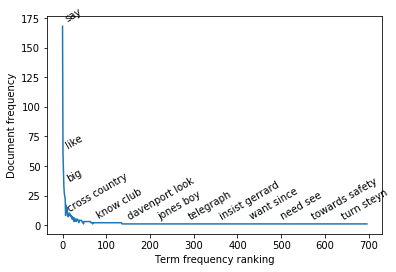

('Printing terms : ', [{'tf': 447, 'df': 168, 'term': u'say', 'idx': 25904}, {'tf': 308, 'df': 134, 'term': u'year', 'idx': 34472}, {'tf': 249, 'df': 106, 'term': u'game', 'idx': 11795}, {'tf': 246, 'df': 102, 'term': u'win', 'idx': 33779}, {'tf': 240, 'df': 104, 'term': u'play', 'idx': 22301}, {'tf': 204, 'df': 104, 'term': u'one', 'idx': 20926}, {'tf': 203, 'df': 112, 'term': u'go', 'idx': 12530}, {'tf': 202, 'df': 112, 'term': u'take', 'idx': 29890}, {'tf': 199, 'df': 52, 'term': u'england', 'idx': 9074}, {'tf': 197, 'df': 103, 'term': u'two', 'idx': 31927}, {'tf': 189, 'df': 115, 'term': u'time', 'idx': 31009}, {'tf': 185, 'df': 89, 'term': u'first', 'idx': 10793}, {'tf': 180, 'df': 92, 'term': u'world', 'idx': 34199}, {'tf': 175, 'df': 87, 'term': u'get', 'idx': 12153}, {'tf': 164, 'df': 82, 'term': u'player', 'idx': 22467}, {'tf': 163, 'df': 108, 'term': u'make', 'idx': 18048}, {'tf': 156, 'df': 93, 'term': u'would', 'idx': 34272}, {'tf': 149, 'df': 85, 'term': u'back', 'idx': 21

254
Top terms for cluster 0:
chelsea
arsenal
game
play
point
()
Top terms for cluster 1:
set
break
match
second
final
()
Top terms for cluster 2:
ball
run
australia
four
test
()
Top terms for cluster 3:
rugby
new
year
european
agree
()
Top terms for cluster 4:
england
ireland
nation
six nation
six
()
Top terms for cluster 5:
record
olympic
world
champion
mark
()
Top terms for cluster 6:
british
year
get
number
go
()
Top terms for cluster 7:
open
australian
australian open
year
grand slam
()
Top terms for cluster 8:
test
miss
face
sport
give
()
Top terms for cluster 9:
club
want
manager
deal
player
()
Top terms for cluster 10:
race
cross
country
year
world
()
Top terms for cluster 11:
cricket
south
england
play
team
()


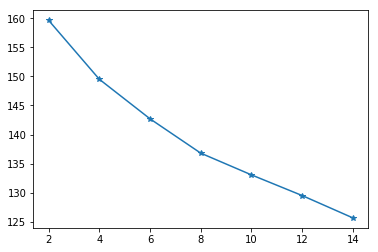

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=2', 0.03524682634924317)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=4', 0.04890749038868627)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=6', 0.05182683638752689)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)
('Silhouette score for k=8', 0.06093025888981984)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300

In [2]:
import pandas as pd
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
import nltk
nltk.download('stopwords')

# load the dataset
df = pd.read_csv('bbc.csv')

# random state
rs = 42

# as usual, explore the dataset
df.info()

# print out the first 200 characters of the first row of text column
print(df.get_value(index=0, col='TEXT')[:200])

# average length of text column
print(df['TEXT'].apply(lambda x: len(x)).mean())


# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# join provided stopwords with the default NLTK English stopwords
stopwords = sw.words('english')

def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')
            import re
            token = re.sub(r'\d+', '', token)

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(df['TEXT'])

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=12, random_state=rs).fit(X)

# function to visualise text cluster. Useful for the assignment too :)
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster))
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx])
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['TEXT'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df['TEXT'])

# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
            
    plt.show()
    print("Printing terms : ", terms)
    
visualise_zipf(terms)

# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=20, max_df=0.8)
X_filter = filter_vec.fit_transform(df['TEXT'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=12, random_state=rs).fit(X_filter)

# visualisation
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec.get_feature_names())

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    kmeans_fil = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    kmeans_fil.fit(X_filter)
    
    # append model to cluster list
    clusters.append(kmeans_fil)
    inertia_vals.append(kmeans_fil.inertia_)
    
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

from sklearn.metrics import silhouette_score
print(clusters[0])
print("Silhouette score for k=2", silhouette_score(X_filter, clusters[0].predict(X_filter)))

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X_filter, clusters[1].predict(X_filter)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X_filter, clusters[2].predict(X_filter)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X_filter, clusters[3].predict(X_filter)))

print(clusters[4])
print("Silhouette score for k=10", silhouette_score(X_filter, clusters[4].predict(X_filter)))

print(clusters[5])
print("Silhouette score for k=12", silhouette_score(X_filter, clusters[5].predict(X_filter)))

print(clusters[6])
print("Silhouette score for k=14", silhouette_score(X_filter, clusters[6].predict(X_filter)))


from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)

# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = filter_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num))
    for i in sorted_comp[comp_num, :5]:
        print(terms[i])
    print()
    
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=7, random_state=rs).fit(X_trans)

# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, filter_vec.get_feature_names())

